#AYUDANTÍA 2 - Introducción a la Ciencia de Datos - IMT2200
- Rocío Ladrón de Guevara (rociohgj@uc.cl)
- Daniela Victorero (dvictorerol@uc.cl)



In [109]:
import requests
import pandas as pd
import json
import numpy as np
import lxml
import os


#PANDAS 🐼

# Observadores 👀

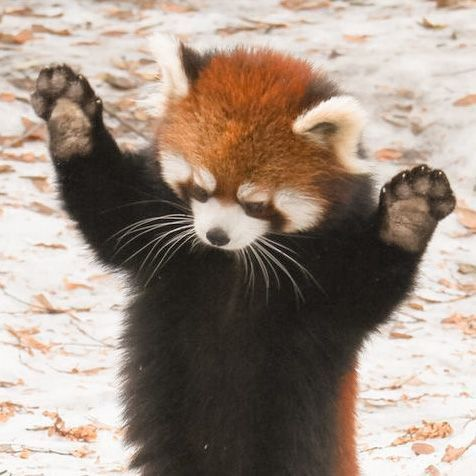

### Imaginemos que estamos en un zoológico y debemos registrar datos sobre los animales que se encuentran allí.

### Entonces tres compañeros registran los datos por separados.

### Uno de ellos cuenta la cantidad de Hurones, pandas rojos y Elefantes.

### Otro cuenta la catidad de lagartos, chimpaces y leones.

### Y el último describe que tipo de alimentación tienen los animales.

In [110]:
df1 = pd.DataFrame(
    {

        'tipo': ['Hurones', 'Elefantes','Pandas Rojos'],
        "Cantidad": [4, 5, 7],

    }


)

df1

,tipo,Cantidad
0,Hurones,4
1,Elefantes,5
2,Pandas Rojos,7


Como vemos en este dataframe se describe los indices del 0 al 2 y las columnas se nombran como tipo y cantidad

In [111]:
df2 = pd.DataFrame(
    {
        'tipo': ['Chimpances', 'Lagartos', 'Leones'],
        "Cantidad": [10, 3, 7],
    }

)

df2

,tipo,Cantidad
0,Chimpances,10
1,Lagartos,3
2,Leones,7


Como vemos en este dataframe se describe los indices del 0 al 2 y las columnas se nombran como tipo y cantidad

In [112]:
df3 = pd.DataFrame(
    {

        'Alimentacion': ['carnivoro','hervivoro','carnivoro']

    },
      index= ['Hurones', 'Elefantes','Pandas Rojos']

)
df3

,Alimentacion
Hurones,carnivoro
Elefantes,hervivoro
Pandas Rojos,carnivoro


Como vemos en este dataframe se describe los indices son los strings **Hurones**, **Elefantes** y **Pantas** Rojos y la columna se nombra como **Alimentación**

##JOIN

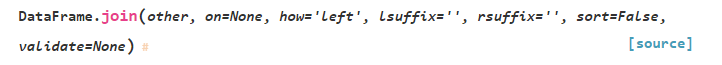

In [113]:
cantidad_alimentacion_join = df1.join(df3, on='tipo')
cantidad_alimentacion_join

,tipo,Cantidad,Alimentacion
0,Hurones,4,carnivoro
1,Elefantes,5,hervivoro
2,Pandas Rojos,7,carnivoro


En que consiste este método : Unimos dos Dataframes con respecto a sus **índices**.

Por eso, tanto los índices de df3 deben coincidir con una columna de df1

##MERGE

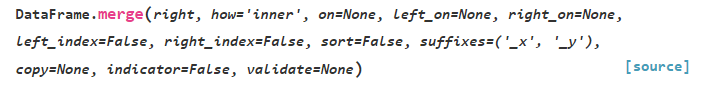

In [114]:
df3_copy = df3.copy().reset_index().rename(columns={'index':'tipo'})
df3_copy

,tipo,Alimentacion
0,Hurones,carnivoro
1,Elefantes,hervivoro
2,Pandas Rojos,carnivoro


In [152]:

cantidad_alimentacion_merge= pd.merge(df1, df3_copy)

cantidad_alimentacion_merge

,tipo,Cantidad,Alimentacion
0,Hurones,4,carnivoro
1,Elefantes,5,hervivoro
2,Pandas Rojos,7,carnivoro


En que consiste este método:  Unimos dos Dataframes con respecto a una sola **Columna**.

Por eso tanto al menos una columna de df3 deben coincidir con una columna de df1.

##CONCATENATE

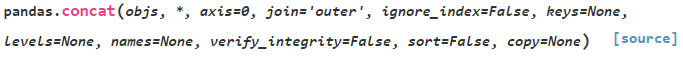

In [146]:
#Todos_los_animales=pd.concat([df1,df2], keys=['df1', 'df2'], axis = 0)
Todos_los_animales=pd.concat([df1,df2], keys=['df1', 'df2'])
Todos_los_animales

tipo  Cantidad
df1 0       Hurones         4
    1     Elefantes         5
    2  Pandas Rojos         7
df2 0    Chimpances        10
    1      Lagartos         3
    2        Leones         7

En que consiste este método: Se concatenan dos dataframes, esto a través de los índices o de las columnas, y también a través de un eje en específico (filas o columnas). En este caso, concat ocupa lógica de conjuntos en el caso de que existan columnas o filas no coicidentes,asignandos NaN en las intercciones vacias.

## Ahora juntemos las tres observaciones en un solo dataframe!

In [117]:
cantidad_alimentacion_join.merge(Todos_los_animales, how='outer')

,tipo,Cantidad,Alimentacion
0,Hurones,4,carnivoro
1,Elefantes,5,hervivoro
2,Pandas Rojos,7,carnivoro
3,Chimpances,10,NaN
4,Lagartos,3,NaN
5,Leones,7,NaN


#XML

In [118]:
file_name = os.path.join('data', 'plant_catalog.xml')

df_plants = pd.read_xml(file_name)
df_plants.head()

,COMMON,BOTANICAL,ZONE,LIGHT,PRICE,AVAILABILITY
0,Bloodroot,Sanguinaria canadensis,4,Mostly Shady,$2.44,31599
1,Columbine,Aquilegia canadensis,3,Mostly Shady,$9.37,30699
2,Marsh Marigold,Caltha palustris,4,Mostly Sunny,$6.81,51799
3,Cowslip,Caltha palustris,4,Mostly Shady,$9.90,30699
4,Dutchman's-Breeches,Dicentra cucullaria,3,Mostly Shady,$6.44,12099


#JSON

In [119]:
file_name_2 = os.path.join('data', 'datapackage.json')

with open(file_name_2) as archivo:
  data = json.load(archivo) #abre un archivo y lo retorna en formato json
data

{'bytes': 524123495,
 'datahub': {'created': '2018-08-21T21:19:13.358216',
  'findability': 'published',
  'flowid': 'machine-learning/creditcard/1',
  'modified': '2018-08-21T21:19:13.358216',
  'owner': 'machine-learning',
  'ownerid': 'machine-learning'},
 'description': 'The resources for this dataset can be found at https://www.openml.org/d/1597\n\nAuthor: Andrea Dal Poz',
 'hash': '4bdb88ff0caf170fa325249b653eb7b9',
 'id': 'machine-learning/creditcard',
 'licenses': [{'name': 'ODC-PDDL',
   'path': 'http://opendatacommons.org/licenses/pddl/',
   'title': 'Open Data Commons Public Domain Dedication and License'}],
 'name': 'creditcard',
 'resources': [{'bytes': 150828690,
   'datahub': {'type': 'original'},
   'dialect': {'delimiter': ',', 'quoteChar': '"'},
   'dpp:streamedFrom': 'https://s3.amazonaws.com/rawstore.datahub.io/c4192d47fe390580a780085dea5faa81.csv',
   'encoding': 'ISO-8859-2',
   'format': 'csv',
   'mediatype': 'text/csv',
   'name': 'creditcard_original',
   'pat

Cargar archivo .json a un dataframe de *pandas*.

*Dataset: Casos diarios de Covid en USA*

In [120]:
file_name_3 = os.path.join('data', 'daily.json')

df = pd.read_json(file_name_3)
df.head()

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,lastModified,recovered,total,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
0,20210307,56,28756489.0,74582825.0,11808.0,40199.0,776361.0,8134.0,45475.0,2802.0,...,2021-03-07T24:00:00Z,NaN,0,0,842,726,131835,41835,1170059,a80d0063822e251249fd9a44730c49cb23defd83
1,20210306,56,28714654.0,74450990.0,11783.0,41401.0,775635.0,8409.0,45453.0,2811.0,...,2021-03-06T24:00:00Z,NaN,0,0,1680,503,143835,60015,1430992,dae5e558c24adb86686bbd58c08cce5f610b8bb0
2,20210305,56,28654639.0,74307155.0,12213.0,42541.0,775132.0,8634.0,45373.0,2889.0,...,2021-03-05T24:00:00Z,NaN,0,0,2221,2781,271917,68787,1744417,724844c01659d0103801c57c0f72bf8cc8ab025c
3,20210304,56,28585852.0,74035238.0,12405.0,44172.0,772351.0,8970.0,45293.0,2973.0,...,2021-03-04T24:00:00Z,NaN,0,0,1743,1530,177957,65487,1590984,5c549ad30f9abf48dc5de36d20fa707014be1ff3
4,20210303,56,28520365.0,73857281.0,11778.0,45462.0,770821.0,9359.0,45214.0,3094.0,...,2021-03-03T24:00:00Z,NaN,0,0,2449,2172,267001,66836,1406795,fef6c425d2b773a9221fe353f13852f3e4a4bfb0


#APLANAR DATOS ANIDADOS (JSON)

Dataset: Detección de fraude de tarjetas de créditos.

In [121]:
file_name_4 = os.path.join('data', 'datapackage.json')

with open(file_name_4) as archivo:
  data = json.load(archivo)

In [122]:
pd.json_normalize(data)

,bytes,description,hash,id,licenses,name,resources,title,datahub.created,datahub.findability,datahub.flowid,datahub.modified,datahub.owner,datahub.ownerid
0,524123495,The resources for this dataset can be found at...,4bdb88ff0caf170fa325249b653eb7b9,machine-learning/creditcard,"[{'name': 'ODC-PDDL', 'path': 'http://opendata...",creditcard,"[{'bytes': 150828690, 'datahub': {'type': 'ori...",Creditcard,2018-08-21T21:19:13.358216,published,machine-learning/creditcard/1,2018-08-21T21:19:13.358216,machine-learning,machine-learning


In [123]:
pd.json_normalize(data, record_path = 'resources')

,bytes,dpp:streamedFrom,encoding,format,mediatype,name,path,pathType,profile,datahub.type,...,description,hash,delimiter,quotechar,rowcount,signed,datahub.derivedFrom,dialect.doubleQuote,dialect.lineTerminator,dialect.skipInitialSpace
0,150828690,https://s3.amazonaws.com/rawstore.datahub.io/c...,ISO-8859-2,csv,text/csv,creditcard_original,archive/creditcard.csv,local,data-resource,original,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5972,/tmp/tmp9cpa74j5/machine-learning/creditcard/v...,NaN,json,NaN,validation_report,data/validation_report.json,NaN,data-resource,derived/report,...,Validation report for tabular data,fce3c207f6141efa52324f41e9d48d77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,151114991,/tmp/tmp9cpa74j5/machine-learning/creditcard/c...,utf-8,csv,text/csv,creditcard_csv,data/creditcard_csv.csv,local,data-resource,derived/csv,...,NaN,ebdc64b6837b3026238f3fcad3402337,",","""",284807.0,True,[creditcard],True,\r\n,False
3,222172013,/tmp/tmp9cpa74j5/machine-learning/creditcard/c...,utf-8,json,text/csv,creditcard_json,data/creditcard_json.json,local,data-resource,derived/json,...,NaN,9189a84974b5439b73619038cd6a660e,",","""",284807.0,True,[creditcard],NaN,NaN,NaN
4,1829,/tmp/tmphmz68t0p/README.md,NaN,md,NaN,readme,README.md,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#LECTURA DE DATOS CON URL 💽📡

Utilizaremos la librería *[requests](https://requests.readthedocs.io/en/latest/)* para obtener datos a través de url.

In [124]:
url = 'https://imc.uc.cl/' #url del cuál buscamos obtener información
response = requests.get(url) #utilizamos la función '.get()' para obtener una respuesta del sitio, y nos retorna un objeto tipo 'Response'.
text = response.text #el objeto response posee el atributo '.text', el cuál nos entrega en un string el archivo html del sitio
text[0:300]

#NOTA: No siempre la respuesta será el archivo HTML de un sitio, ya que depende de cómo esté configurado.

'\n<!doctype html>\n<html xmlns="http://www.w3.org/1999/xhtml" \n   xml:lang="es-es" lang="es-es" >\n<head><!-- Google Tag Manager -->\n<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({\'gtm.start\':\nnew Date().getTime(),event:\'gtm.js\'});var f=d.getElementsByTagName(s)[0],\nj=d.createElement(s),dl=l!=\'d'

En este caso, obtuvimos cómo respuesta el html del sitio.

In [125]:
url_2 = 'https://api.covidtracking.com/v1/us/daily.json'
response_2 = requests.get(url_2)
text_2 = response_2.text
text_2[0:200]

'[{"date":20210307,"states":56,"positive":28756489,"negative":74582825,"pending":11808,"hospitalizedCurrently":40199,"hospitalizedCumulative":776361,"inIcuCurrently":8134,"inIcuCumulative":45475,"onVen'

Si observamos, ahora esta respuesta nos entrega un archivo de extensión *.json*

Podemos escribir un archivo con los datos obtenidos:

In [126]:
with open('archivo.json', 'w') as archivo:
  archivo.write(text_2)

Próximamente, buscaremos maneras de interpretar esta información para operar con los datos, ya que por ahora sólo se trata de un gran *string* 👀

#EJERCICIOS

1.-

a) Busca el url de un sitio que retorne una respuesta de extensión *.json* y consigue consigue la información a través de la librería  *requests*.



b) Escribe un archivo con los datos obtenidos


c) Carga el archivo guardado a un dataframe de *pandas*


